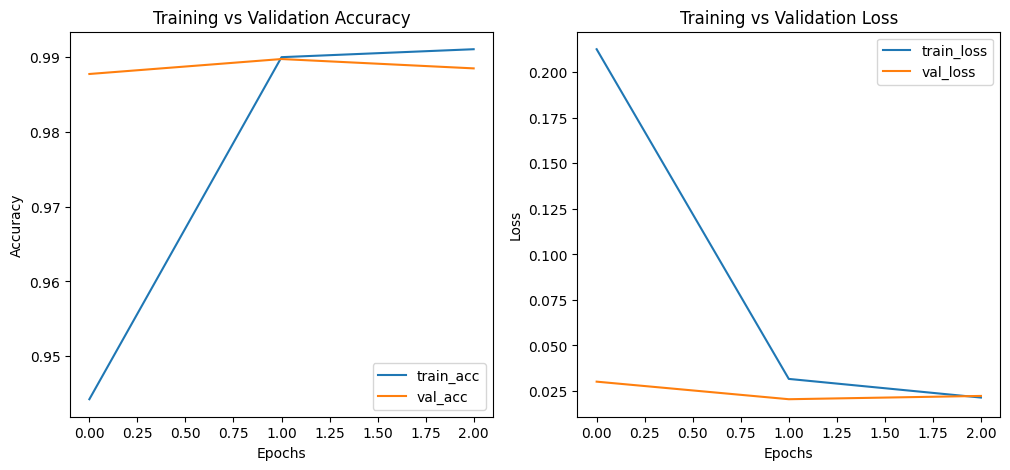

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


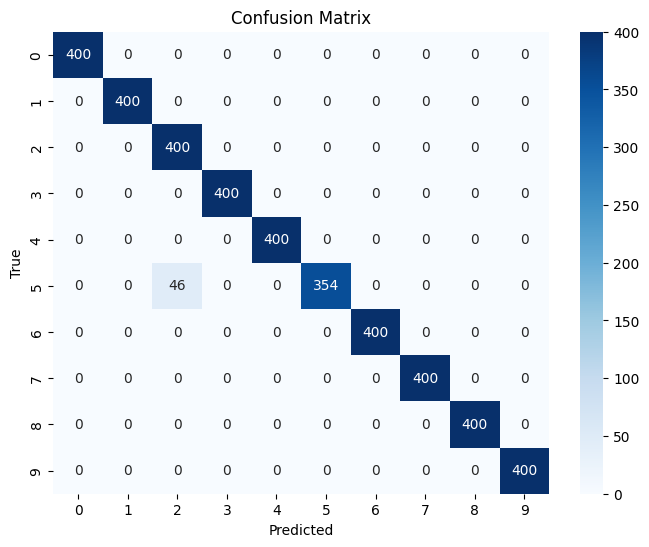

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       0.90      1.00      0.95       400
           3       1.00      1.00      1.00       400
           4       1.00      1.00      1.00       400
           5       1.00      0.89      0.94       400
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       400
           8       1.00      1.00      1.00       400
           9       1.00      1.00      1.00       400

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


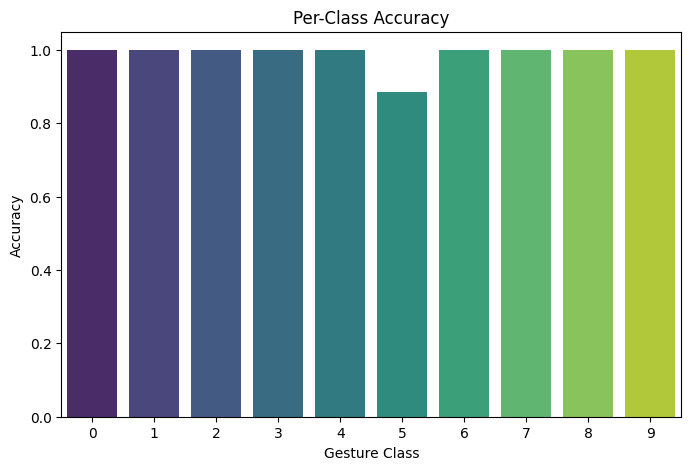

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


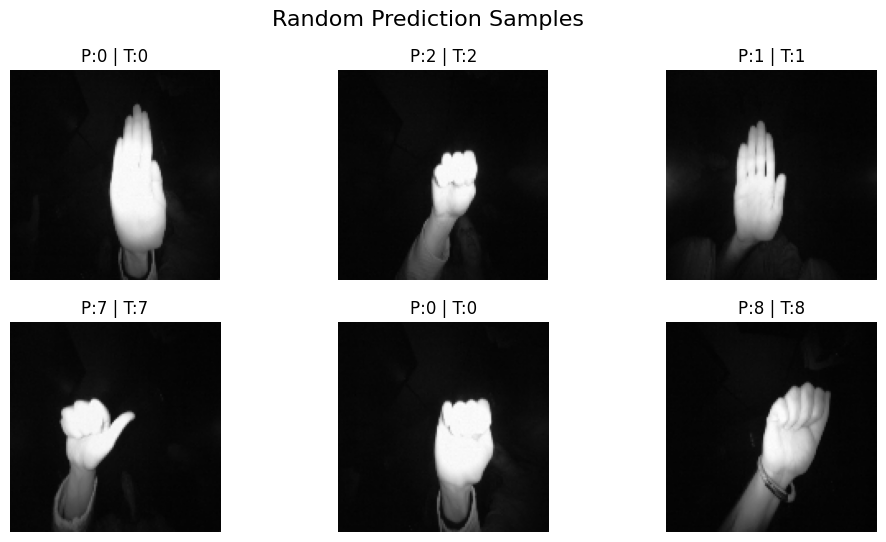

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import random

# =======================
# 1. Accuracy & Loss Curves
# =======================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()

# =======================
# 2. Confusion Matrix
# =======================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(y.shape[1]),
            yticklabels=range(y.shape[1]))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# =======================
# 3. Classification Report
# =======================
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

# =======================
# 4. Per-class Accuracy Bar Chart
# =======================
class_acc = []
for i in range(y.shape[1]):
    idxs = np.where(y_true == i)[0]
    acc = accuracy_score(y_true[idxs], y_pred_classes[idxs])
    class_acc.append(acc)

plt.figure(figsize=(8,5))
sns.barplot(x=list(range(y.shape[1])), y=class_acc, palette="viridis")
plt.xlabel("Gesture Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.show()

# =======================
# 5. Random Prediction Gallery
# =======================
plt.figure(figsize=(12,6))
for i in range(6):
    idx = random.randint(0, X_test.shape[0]-1)
    sample = np.expand_dims(X_test[idx], axis=0)
    pred = model.predict(sample)
    pred_class = np.argmax(pred)
    true_class = y_true[idx]
    
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[idx])
    plt.title(f"P:{pred_class} | T:{true_class}")
    plt.axis("off")

plt.suptitle("Random Prediction Samples", fontsize=16)
plt.show()